# Low Sample-Size Problem

This notebook aims to illustrate the so-called **"Low Sample-Size Problem"** i.e. where the number of dimensions is larger than number of samples. For this purpose we use the **ORL Face Dataset** from Cambridge, generously provided by **Ferdinando Samaria** and **Andy Harter** ([see here](https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html)) to inspect this topic through a [**Face Embedding**](https://www.cs.ucsb.edu/~mturk/Papers/jcn.pdf) showcase.

The dataset consists of 400 images of 40 people, 10 image per each person. Each image is a simple gray-scale image of size $92\times112(=10304)$, thus the data contains $400$ points in $10304$ dimenional space! Gray-levels are encoded from $0$ (black) to $255$

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import eigh

Now we read the images. Images will be flattened into a 1d array of size 10304 and placed on each other. At the end each row of the matrix *data* is an image of a person and columns are pixels of that image, read row-by-row.

For sake of data overview, we also show one image per person.

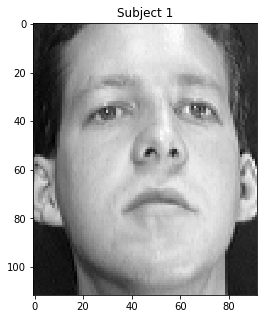

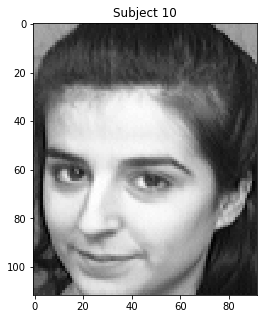

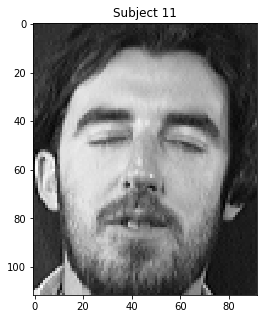

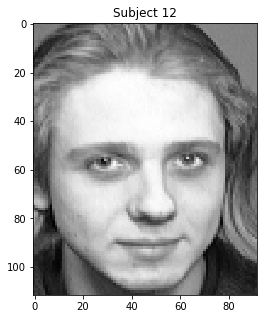

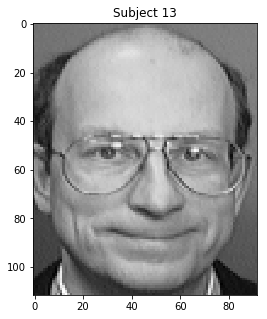

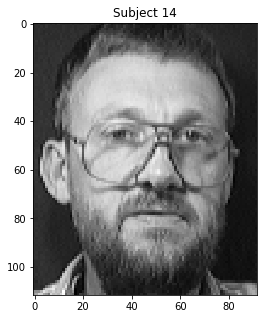

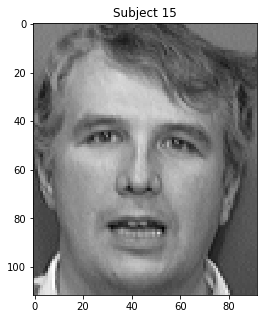

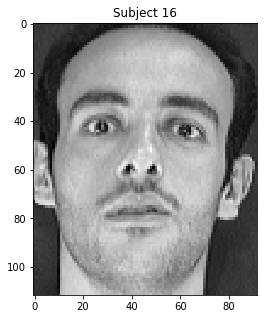

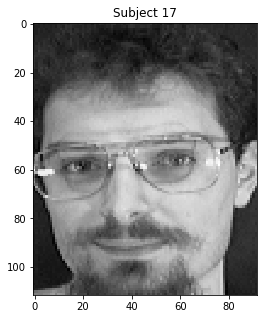

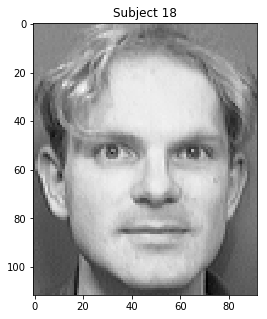

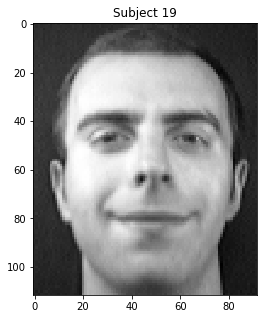

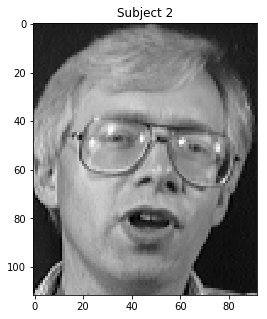

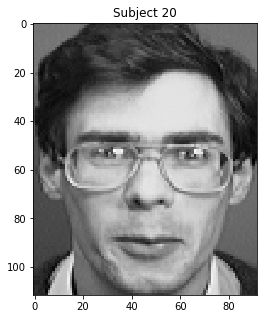

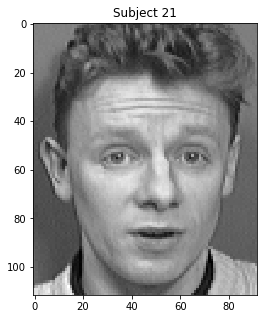

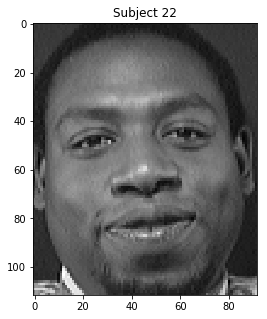

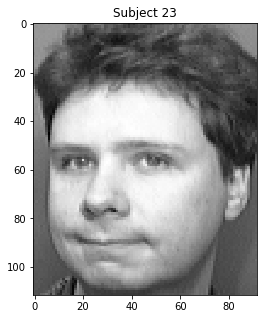

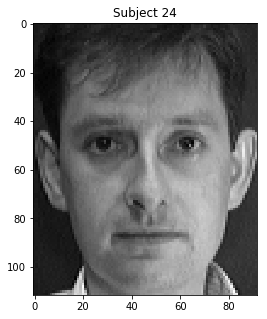

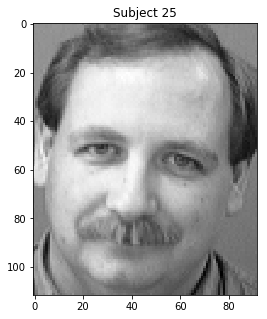

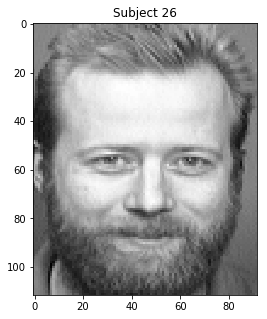

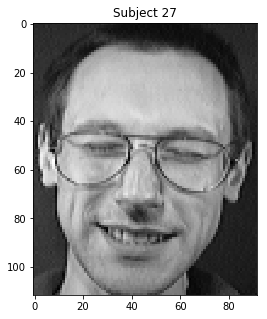

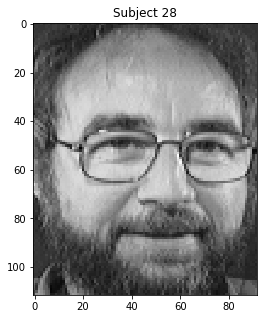

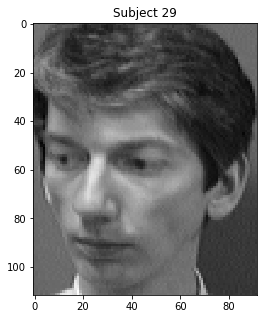

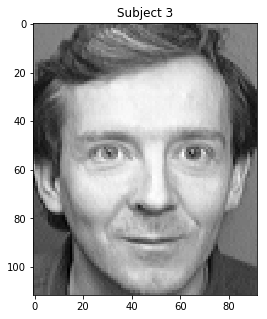

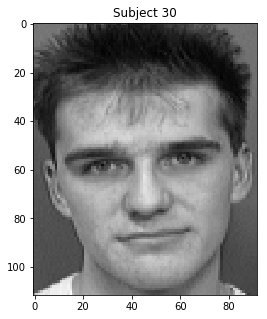

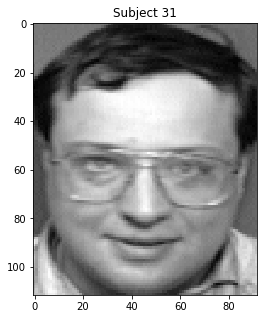

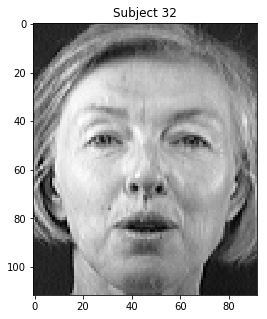

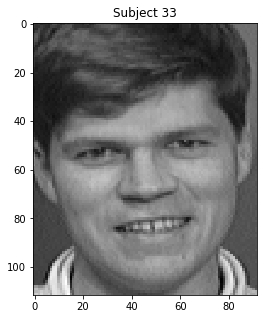

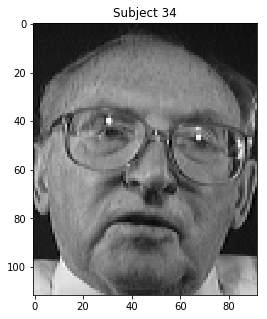

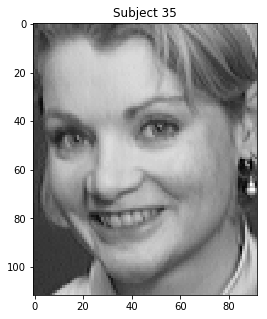

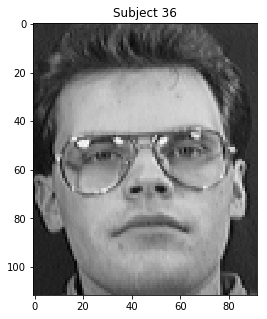

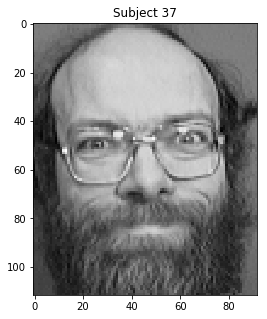

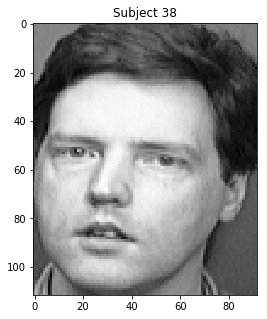

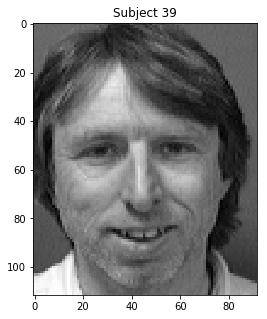

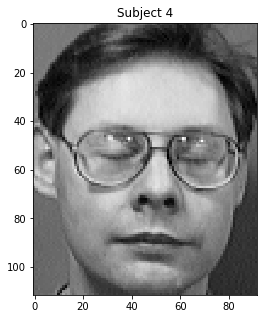

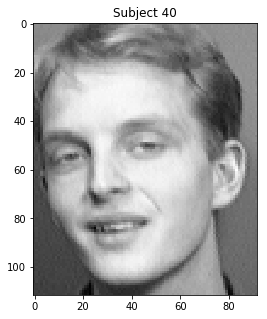

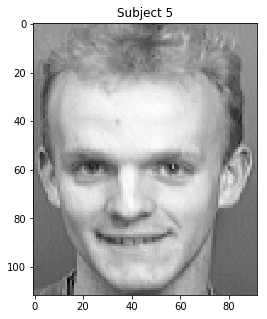

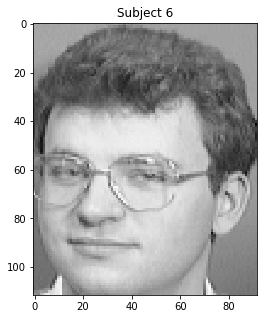

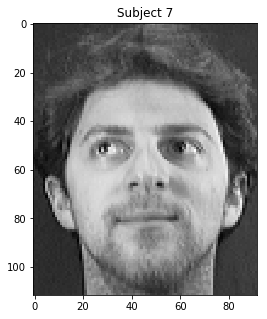

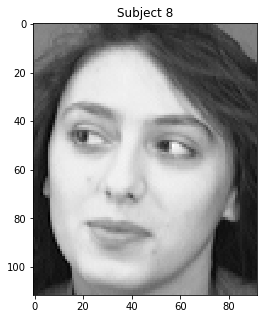

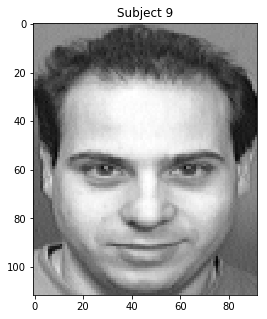

In [2]:
data = np.empty((0,10304), int)
tags = []
for folder in os.listdir('orl_faces/'):
    if folder != 'README':
        for im in os.listdir('orl_faces/'+folder):
            tags.append(folder)
            img = plt.imread('orl_faces/'+folder+'/'+im).flatten().reshape(1,10304)
            data = np.append(data, img, axis=0)
        plt.figure(figsize=(5,5))
        plt.imshow(plt.imread('orl_faces/'+folder+'/'+im),cmap='gray') # show 1 sample from each subject
        plt.title('Subject '+folder[1::])
        plt.show()


First of all, let's have an insight to the data matrix and then "zero-mean" the data i.e. subtracting the **mean image** from all images.

Mean image is simply an image whose pixel $(i,j)$ is the mean of all images at pixel $(i,j)$.

In [3]:
print('min and max of data are:', (np.min(data),np.max(data)))

min and max of data are: (0, 251)


which means there is no complete white in any of images. The contrast of a gray-scale image is adjusted (increased) by scaling it to (0,255), however, here the adjustment will not be that effective (only 4 gray-levels) and is not the topic of current task!

Let's compute the mean image and also visualize it:

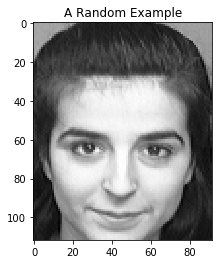

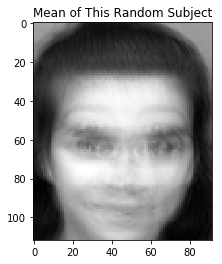

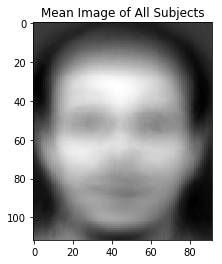

In [4]:
mean_img = np.mean(data[10:19,:],axis=0)
plt.figure()
plt.imshow(data[18,:].reshape(112,92),cmap='gray')
plt.title('A Random Example')
plt.figure()
plt.imshow(mean_img.reshape(112,92),cmap='gray')
plt.title('Mean of This Random Subject')
plt.figure()
mean_img = np.mean(data,axis=0)
plt.imshow(mean_img.reshape(112,92),cmap='gray')
plt.title('Mean Image of All Subjects')
plt.show()

Now we subtract this mean image from all. This translation, drags the cloud of 400 points in a way that their mean is placed on the origin of 10304 dimensional space.

In [119]:
zero_mean_data = data - mean_img
print(zero_mean_data.shape)
print(np.mean(zero_mean_data))

(400, 10304)
-1.02388766892e-15


The covariance of this centered data illustrates the information of each pixel. How many pixels are informative according to the lecture?!!!

In [121]:
CoV = zero_mean_data.T.dot(zero_mean_data) # How did we compute covariance matrix here?
CoV.shape

(10304, 10304)

In [122]:
from scipy.linalg import eigh

vals,vecs = eigh(CoV)

In [129]:
nonzeros = vals>0.00001
nonzeros.sum()

399

Now let's try the same without centering the data. **How many informative pixel do you expect to find and why?!!**

In [6]:
CoV_orig = data.T.dot(data)
CoV_orig.shape


(10304, 10304)

In [7]:
vals_orig,vecs_orig = eigh(CoV_orig)

In [11]:
nonzeros_orig = vals_orig > 0.0001
nonzeros_orig.sum()

400

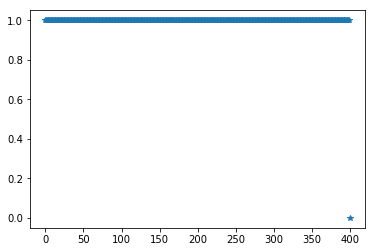

In [13]:
plt.plot(sorted(nonzeros_orig,reverse=True)[0:401],'*')
plt.show()

# Answer

The process of centering data reduces the number of needed dimensions by 1 as the most trivial dimension is the distance of data mean to the origin.

An exaggerated example of this is 1 point in 2-d.

This point needs only a 1-d manifold to be modeled and on that 1-d manifold the value of the point is its distance to the origin. If we reduce the mean of this data from it (mean of a number is itself) then we hav actually just a number $0$ which conceptually does not need any dimension to be modeled! (More precisely whole data is just an origin of a 1-d space which is a point i.e. 0-d manifold)